## KAGGLE : TITANIC

## imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import (ensemble, preprocessing, tree)
from sklearn.metrics import (auc, confusion_matrix, roc_auc_score, roc_curve)
from sklearn.model_selection import (train_test_split, StratifiedKFold)

In [2]:
#!pip install yellowbrick

In [3]:
#from yellowbrick.classifier import (ConfusionMatrix, ROCAUC)

## reading data

In [4]:
df = pd.read_csv('data/train.csv')

In [5]:
#X = df.iloc[:, 2:]
#y = df.iloc[:, 1]

# describing data

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

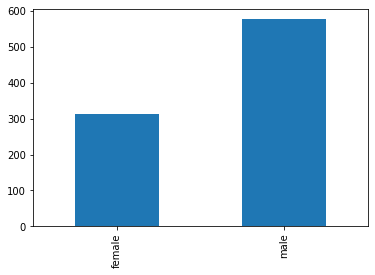

In [8]:
df.Sex.value_counts().sort_values().plot.bar()

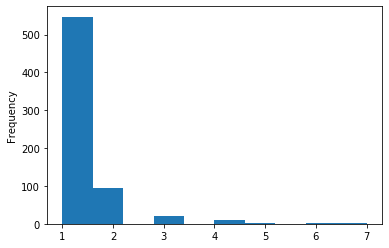

In [9]:
df.Ticket.value_counts().plot.hist()

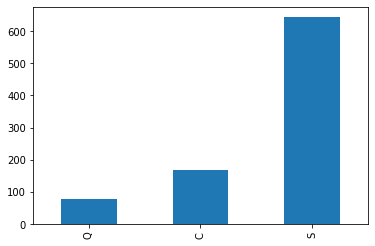

In [10]:
df.Embarked.value_counts().sort_values().plot.bar()

### handling missing data

In [11]:
df.isnull().sum(axis = 1)

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64

In [12]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [13]:
nullColumns = df.columns[df.isnull().any()]
nullColumns

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [14]:
df.Age.isnull().describe()

count       891
unique        2
top       False
freq        714
Name: Age, dtype: object

In [15]:
df.Cabin.isnull().describe()

count      891
unique       2
top       True
freq       687
Name: Cabin, dtype: object

In [16]:
df.Embarked.isnull().describe()

count       891
unique        2
top       False
freq        889
Name: Embarked, dtype: object

## Attributes manipulation

In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Pclass

In [18]:
df.Pclass.describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

#### Name

In [19]:
df.Name.describe()

count                            891
unique                           891
top       Tomlin, Mr. Ernest Portage
freq                               1
Name: Name, dtype: object

##### dropping Name as it does not have any importance (all names are unique)

#### Name

In [20]:
df.Sex.describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

#### Age

In [21]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### SibSp - numero irmaos esposa a bordo

In [22]:
df.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

#### Parch - N pais filhos a bordo

In [23]:
df.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

#### Ticket - Numero da passagem

In [24]:
df.Ticket.describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

#### Fare

In [25]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

#### Cabin

In [26]:
df.Cabin.describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

#### Embarked - local embarque

In [27]:
df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

### Dropping columns

In [28]:
# ticket: string com quase todos unique 
# Name: todos unique
# Cabin = muitos uniques tbm

In [29]:
df = df.drop(columns=['Ticket', 'Name', 'Cabin', 'PassengerId'])

### Strings => categorical

In [30]:
df = pd.get_dummies(df, drop_first = True)
# drop first => retirar coluna que seja inversamente correlacionadas: ex Female e Male, so precisa de uma

In [31]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


## Split

In [32]:
y = df.Survived
X = df.drop(columns=['Survived'])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

## Missing Data

#### fill both train and test based only on info provided by train => AVOID LEAK 

In [40]:
meds = X_train.median()

X_train = X_train.fillna(meds)
X_test = X_train.fillna(meds)